# Import all necessary Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense, MaxPooling2D, Conv2D, Flatten, Dropout
from keras.callbacks import ModelCheckpoint

In [2]:
# import numpy as np
# import matplotlib
# import tensorflow

# print(np.__version__)
# print(matplotlib.__version__)
# print(tensorflow.__version__)
# print(keras.__version__)

In [3]:
train_data_path = "/content/drive/MyDrive/Deep Learning/Supervised Learning/CNN With Keras/Cotton Plant Disease/data/train"
validation_data_path = "/content/drive/MyDrive/Deep Learning/Supervised Learning/CNN With Keras/Cotton Plant Disease/data/val"

In [4]:
# Make a function for showing augmented images

def plotImages(img_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(img_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [5]:
# This is the augmentation configuration we will use for training
# It will generate more images using below parameters

training_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode="nearest")


In [6]:
# This is a generator that will read pictures found in 
# at train_data_path, and indefinitely generate batches of augmented image data

training_data = training_datagen.flow_from_directory(directory=train_data_path,# this is the target dir
                                                     target_size=(150,150),# all images will be resized to 150 x 150
                                                     batch_size=32, # Pick 32 img at a time
                                                     class_mode="binary")# since we use binary_crossentropy loss, we need binary labels

Found 1951 images belonging to 4 classes.


In [7]:
training_data.class_indices

{'diseased cotton leaf': 0,
 'diseased cotton plant': 1,
 'fresh cotton leaf': 2,
 'fresh cotton plant': 3}

In [8]:
# this is the augmentation configuration we will use for validation: only rescaling

validation_datagen = ImageDataGenerator(rescale=1./255)

# This is a similar generator, for validation data
validation_data = validation_datagen.flow_from_directory(directory=validation_data_path,# this is the target dir
                                                     target_size=(150,150),# all images will be resized to 150 x 150
                                                     batch_size=32, # Pick 32 img at a time
                                                     class_mode="binary")# since we use binary_crossentropy loss, we need binary labels

Found 324 images belonging to 4 classes.


In [9]:
validation_data.class_indices

{'diseased cotton leaf': 0,
 'diseased cotton plant': 1,
 'fresh cotton leaf': 2,
 'fresh cotton plant': 3}

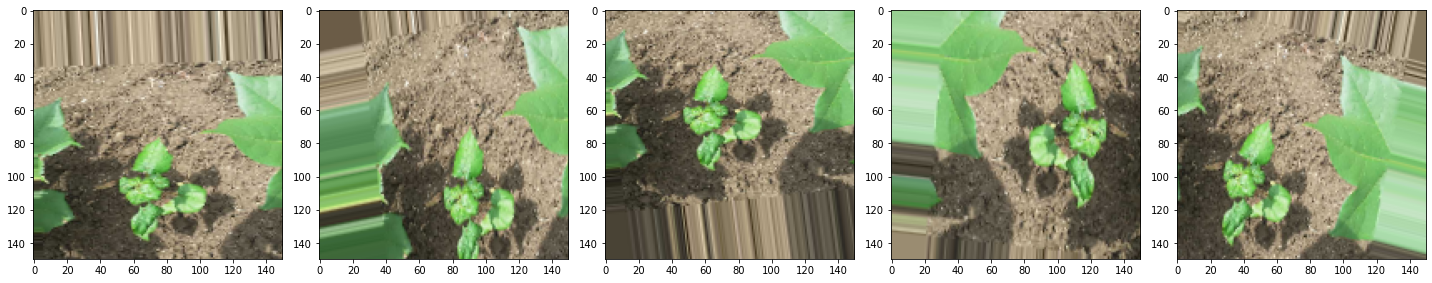

In [10]:
# Showing augmented images

images = [training_data[0][0][0] for i in range(5)]
plotImages(images)

In [11]:
images[0]

array([[[0.63560677, 0.5807048 , 0.47874397],
        [0.5666759 , 0.51177394, 0.40981314],
        [0.5025241 , 0.44762212, 0.3456613 ],
        ...,
        [0.6769779 , 0.6220759 , 0.52011514],
        [0.36942863, 0.31452668, 0.21256591],
        [0.4051445 , 0.35024256, 0.24828175]],

       [[0.64306766, 0.5881657 , 0.4862049 ],
        [0.56765765, 0.51275563, 0.41079485],
        [0.50939596, 0.454494  , 0.35253322],
        ...,
        [0.70112765, 0.6462257 , 0.54426485],
        [0.37001768, 0.3151157 , 0.21315493],
        [0.3914007 , 0.33649874, 0.23453797]],

       [[0.65052855, 0.5956266 , 0.4936658 ],
        [0.5686393 , 0.5137373 , 0.41177654],
        [0.5162679 , 0.4613659 , 0.35940513],
        ...,
        [0.7252775 , 0.67037547, 0.5684147 ],
        [0.3706067 , 0.31570473, 0.21374395],
        [0.37765694, 0.32275498, 0.22079419]],

       ...,

       [[0.23460022, 0.22675708, 0.17969826],
        [0.23659448, 0.22875135, 0.18169251],
        [0.23858875, 0

In [12]:
training_data[0][0][0]

array([[[0.6039216 , 0.8235295 , 0.58431375],
        [0.6039216 , 0.8235295 , 0.58431375],
        [0.59991646, 0.8195243 , 0.5803086 ],
        ...,
        [0.50498104, 0.44615752, 0.3716477 ],
        [0.46802336, 0.4091998 , 0.33469   ],
        [0.55083746, 0.49201393, 0.41750413]],

       [[0.60803664, 0.82764447, 0.5884288 ],
        [0.6039216 , 0.8235295 , 0.58431375],
        [0.6039216 , 0.8235295 , 0.58431375],
        ...,
        [0.47621426, 0.41739073, 0.34288093],
        [0.51509523, 0.45627165, 0.38176185],
        [0.66147596, 0.60265243, 0.5270947 ]],

       [[0.6180056 , 0.83761346, 0.59839773],
        [0.6103277 , 0.82993555, 0.5907199 ],
        [0.60577023, 0.8253781 , 0.5861624 ],
        ...,
        [0.47935295, 0.4205294 , 0.3460196 ],
        [0.63254523, 0.5737217 , 0.49921188],
        [0.7471166 , 0.6882931 , 0.6078416 ]],

       ...,

       [[0.67118603, 0.6046388 , 0.49411768],
        [0.6245088 , 0.55784214, 0.4480382 ],
        [0.63986754, 0

In [13]:
# Save the best model using val-accuracy

model_path = "/content/drive/MyDrive/Deep Learning/Supervised Learning/CNN With Keras/Cotton Plant Disease/cnn_best_model.h5"
checkpoint = ModelCheckpoint(filepath=model_path,
                             monitor='val_accuracy',
                             verbose=1,
                             save_best_only=True,
                             mode='max')
callbacks_list = [checkpoint]


In [14]:
callbacks_list

# **Building CNN model**

In [15]:
model = keras.models.Sequential([
                                    keras.layers.Conv2D(filters=32, kernel_size=3, input_shape=[150, 150, 3]),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=64, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=128, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),                                    
                                    keras.layers.Conv2D(filters=256, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),

                                    keras.layers.Dropout(0.5),                                                                        
                                    keras.layers.Flatten(), # neural network beulding
                                    keras.layers.Dense(units=128, activation='relu'), # input layers
                                    keras.layers.Dropout(0.1),                                    
                                    keras.layers.Dense(units=256, activation='relu'),                                    
                                    keras.layers.Dropout(0.25),                                    
                                    keras.layers.Dense(units=4, activation='softmax') # output layer
])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 256)       2

In [17]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 256)       2

In [19]:
# Train cnn model and  Fit the model
history = model.fit(x=training_data,
                    batch_size=100,
                    epochs=30, 
                    verbose=1, 
                    validation_data= validation_data,
                    callbacks=callbacks_list)

Epoch 1/30
61/61 [==============================] - 32s 477ms/step - loss: 1.2356 - accuracy: 0.4593 - val_loss: 1.2769 - val_accuracy: 0.3951

Epoch 00001: val_accuracy improved from -inf to 0.39506, saving model to /content/drive/MyDrive/Deep Learning/Supervised Learning/CNN With Keras/Cotton Plant Disease/cnn_best_model.h5
Epoch 2/30
61/61 [==============================] - 29s 473ms/step - loss: 1.0071 - accuracy: 0.6012 - val_loss: 0.8980 - val_accuracy: 0.6019

Epoch 00002: val_accuracy improved from 0.39506 to 0.60185, saving model to /content/drive/MyDrive/Deep Learning/Supervised Learning/CNN With Keras/Cotton Plant Disease/cnn_best_model.h5
Epoch 3/30
61/61 [==============================] - 29s 476ms/step - loss: 0.9076 - accuracy: 0.6335 - val_loss: 0.8590 - val_accuracy: 0.5895

Epoch 00003: val_accuracy did not improve from 0.60185
Epoch 4/30
61/61 [==============================] - 29s 472ms/step - loss: 0.8477 - accuracy: 0.6586 - val_loss: 0.7288 - val_accuracy: 0.7160

In [20]:
model_path2 = "/content/drive/MyDrive/Deep Learning/Supervised Learning/CNN With Keras/Cotton Plant Disease/cnn_best_model2.h5"
model.save(model_path2)

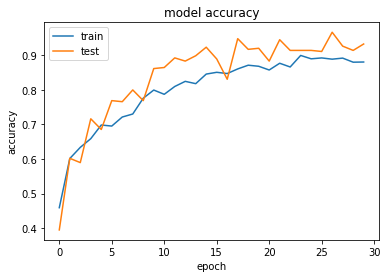

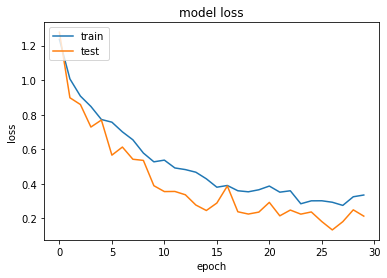

In [21]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [22]:
history.history

{'accuracy': [0.45925167202949524,
  0.6012301445007324,
  0.6335212588310242,
  0.6586365699768066,
  0.6981035470962524,
  0.6950281858444214,
  0.7211686372756958,
  0.7298821210861206,
  0.7754997611045837,
  0.7990773916244507,
  0.7867760062217712,
  0.809328556060791,
  0.8241927027702332,
  0.8175294995307922,
  0.8452075719833374,
  0.8503331542015076,
  0.8467452526092529,
  0.8600717782974243,
  0.8708354830741882,
  0.8677601218223572,
  0.8569964170455933,
  0.876473605632782,
  0.8657099008560181,
  0.8990261554718018,
  0.889287531375885,
  0.8918503522872925,
  0.8882624506950378,
  0.8913377523422241,
  0.879548966884613,
  0.8800615072250366],
 'loss': [1.2355921268463135,
  1.0070881843566895,
  0.9076497554779053,
  0.8477277159690857,
  0.77235347032547,
  0.7568929195404053,
  0.7009232044219971,
  0.6548765897750854,
  0.5783657431602478,
  0.527625322341919,
  0.5374189615249634,
  0.492237389087677,
  0.48272696137428284,
  0.4675200283527374,
  0.4293761849403